In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42069)

In [ ]:
# The ground truth functions

A0, A1, A2 = 0.4, -1.7, 0.9
C0, C1 = 12, 4
lin = lambda x : C1*x + C0
quad = lambda x : A2*(x**2) + A1*x + A0

In [ ]:
# Creating the data sets

train_size, test_size = 100, 50
rng = 5
train_x, test_x = np.random.ranf(train_size), np.random.ranf(test_size)
train_x, test_x = (train_x)*rng, (test_x)*rng


In [ ]:
lin_data = {'train_x' : train_x, 'train_y' : lin(train_x), 
             'test_x' : test_x ,  'test_y' : lin(test_x)}
quad_data = {'train_x' : train_x, 'train_y' : quad(train_x), 
              'test_x' : test_x,   'test_y' : quad(test_x)}

In [ ]:
# Adding Guassian Noise (in the direction perpendicular to the curves)

noise = np.random.normal(0,0.07,1000)

lin_slope = lambda x : C1 + 0*x
quad_slope = lambda x : A2*x + A1
f = lambda d : np.reciprocal(np.sqrt(d**2 + 1))

lin_data.update({'train_slope' : lin_slope(lin_data['train_x']),
                  'test_slope' : lin_slope(lin_data['test_x'])})
quad_data.update({'train_slope' : quad_slope(quad_data['train_x']),
                   'test_slope' : quad_slope(quad_data['test_x'])})

for data in [lin_data, quad_data]:
  for typ,size in [('train_',train_size), ('test_',test_size)]:
    noise_y = f(data[typ+'slope'])*noise[0:size]
    noise_x = -noise_y*data[typ+'slope']
    data[typ+'x'] = data[typ+'x'] + noise_x
    data[typ+'y'] = data[typ+'y'] + noise_y

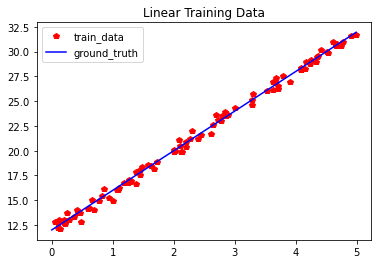

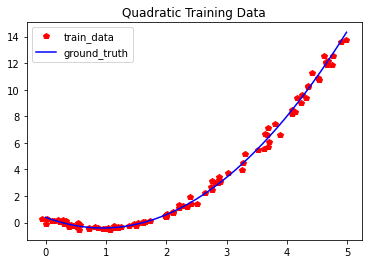

In [ ]:
# Visualizing Data 

x = np.arange(0,rng,0.01)
y_lin, y_quad = lin(x), quad(x)

plt.plot(lin_data['train_x'], lin_data['train_y'], 'rp')
plt.plot(x, y_lin,'b')
plt.legend(['train_data', 'ground_truth'])
plt.title('Linear Training Data')
plt.show()

plt.plot(quad_data['train_x'], quad_data['train_y'], 'rp')
plt.plot(x, y_quad,'b')
plt.legend(['train_data', 'ground_truth'])
plt.title('Quadratic Training Data')
plt.show()

In [ ]:
# Forward Propagation

def cost(z,y,m):
  delta = abs(z-y)
  loss = (1/np.size(z))*np.sum(delta**m)
  dZ = m*(delta**(m-1))*np.sign(z-y)
  return loss,dZ

def lin_for_prop(w,b,x,y,m):
  z = w*x + b
  return cost(z,y,m)

def quad_for_prop(a,b,c,x,y,m):
  z = a*(x**2) + b*x + c
  return cost(z,y,m)

In [ ]:
# Backward Propagation
def lin_back_prop(w,b,x,dZ):
  dw = (1/np.size(x))*np.sum(dZ*x)
  db = (1/np.size(x))*np.sum(dZ)
  return dw,db

def quad_back_prop(a,b,c,x,dZ):
  da = (1/np.size(x))*np.sum(dZ*(x**2))
  db = (1/np.size(x))*np.sum(dZ*x)
  dc = (1/np.size(x))*np.sum(dZ)
  return da,db,dc

In [ ]:
# Train Functions

def lin_train(data,w,b,m,initialize_weights=False,learning_rate=0.0001,epochs=300000):
  print(f"Training Linear Regression Model using COST = (y-z)**{m}")

  if initialize_weights:
    w,b = np.random.randn(),0

  train_loss, test_loss = [],[]
  min_loss = float('inf')

  x,y = data['train_x'], data['train_y']
  xtst, ytst = data['test_x'], data['test_y']

  for i in range(epochs):
    loss1, dZ = lin_for_prop(w,b,x,y,m)
    loss2, _ = lin_for_prop(w,b,xtst,ytst,m)

    print(f"Cost after {i+1} iterations : Training Loss =  {loss1}; Validation Loss = {loss2}")

    train_loss.append(loss1)
    test_loss.append(loss2)

    if loss1 == float('inf'):
      w,b = np.random.randn(0),0
    if loss2 < min_loss:
      min_loss = loss2
      W,B = w,b

    dw,db = lin_back_prop(w,b,x,dZ)
    w = w - learning_rate*dw
    b = b - learning_rate*db 

  print(f"Training Complete : min_loss_achieved = {min_loss}; W,B = {W,B}")

  return W,B,train_loss,test_loss


def quad_train(data,a,b,c,m,initialize_weights=False,learning_rate=0.0001,epochs=300000):
  print(f"Training Quadratic Regression Model using COST = (y-z)**{m}")

  if initialize_weights:
    a,b,c = np.random.randn(2),0

  train_loss, test_loss = [],[]
  min_loss = float('inf') 

  x, y = data['train_x'], data['train_y']
  xtst, ytst = data['test_x'], data['test_y']

  for i in range(epochs):
    loss1, dZ = quad_for_prop(a,b,c,x,y,m)
    loss2, _ = quad_for_prop(a,b,c,xtst,ytst,m)

    print(f"Cost after {i+1} iterations : Training Loss =  {loss1}; Validation Loss = {loss2}")
    
    train_loss.append(loss1)
    test_loss.append(loss2)

    if loss1 == float('inf'):
      a,b,c = np.random.randn(3)
    if loss2 < min_loss:
      min_loss = loss2
      A,B,C = a,b,c

    da,db,dc = quad_back_prop(a,b,c,x,dZ)
    a = a - learning_rate*da
    b = b - learning_rate*db
    c = c - learning_rate*dc 
    
  print(f"Training Complete : min_loss_achieved = {min_loss}; A,B,C = {A,B,C}")

  return A,B,C,train_loss,test_loss

In [ ]:
# Initializing weights
L1,Q2,Q1 = np.random.randn(3)
L0,Q0 = 0,0

lin_results, quad_results = [],[]

In [ ]:
# Model-1 Training
lin_results.append(lin_train(lin_data,L1,L0,1))

In [ ]:
# Model-2 Training
lin_results.append(lin_train(lin_data,L1,L0,3))

In [ ]:
# Model-3 Training
quad_results.append(quad_train(quad_data,Q2,Q1,Q0,4))

In [ ]:
# Model-4 Training
quad_results.append(quad_train(quad_data,Q2,Q1,Q0,7))

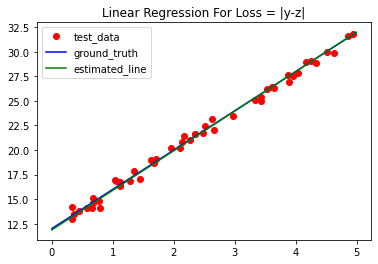

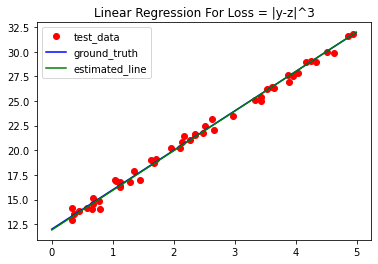

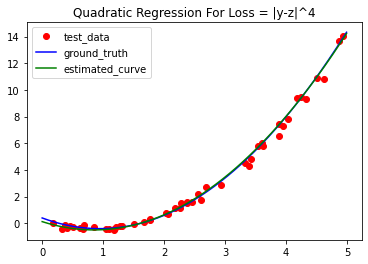

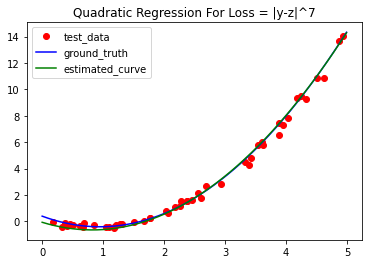

In [ ]:
# Visualizing Individual Results :

W,B,_,_ = lin_results[0]
y = lambda x : W*x + B
plt.plot(lin_data['test_x'], lin_data['test_y'], 'ro')
plt.plot(x, y_lin, 'b')
plt.plot(x, y(x), 'g')
plt.legend(['test_data', 'ground_truth', 'estimated_line'])
plt.title('Linear Regression For Loss = |y-z|')
plt.show()

W,B,_,_ = lin_results[1]
y = lambda x : W*x + B
plt.plot(lin_data['test_x'], lin_data['test_y'], 'ro')
plt.plot(x, y_lin, 'b')
plt.plot(x, y(x), 'g')
plt.legend(['test_data', 'ground_truth', 'estimated_line'])
plt.title('Linear Regression For Loss = |y-z|^3')
plt.show()

A,B,C,_,_ = quad_results[0]
y = lambda x : A*(x**2) + B*x + C
plt.plot(quad_data['test_x'], quad_data['test_y'], 'ro')
plt.plot(x, y_quad, 'b')
plt.plot(x, y(x), 'g')
plt.legend(['test_data', 'ground_truth', 'estimated_curve'])
plt.title('Quadratic Regression For Loss = |y-z|^4')
plt.show()

A,B,C,_,_ = quad_results[1]
y = lambda x : A*(x**2) + B*x + C
plt.plot(quad_data['test_x'], quad_data['test_y'], 'ro')
plt.plot(x, y_quad, 'b')
plt.plot(x, y(x), 'g')
plt.legend(['test_data', 'ground_truth', 'estimated_curve'])
plt.title('Quadratic Regression For Loss = |y-z|^7')
plt.show()




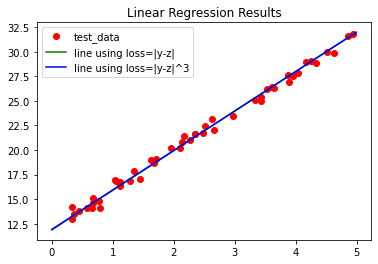

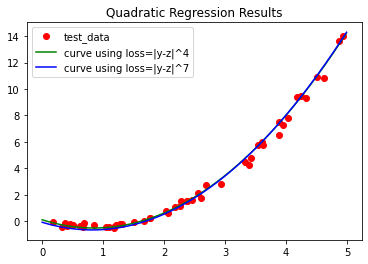

In [ ]:
# Comparing the Estimated Curves

W,B,_,_ = lin_results[0]
W1,B1,_,_ = lin_results[1]
y = lambda x : W*x + B
g = lambda x : W1*x + B1
plt.plot(lin_data['test_x'], lin_data['test_y'], 'ro')
plt.plot(x, y(x), 'g')
plt.plot(x, g(x), 'b')
plt.legend(['test_data', 'line using loss=|y-z|', 'line using loss=|y-z|^3'])
plt.title('Linear Regression Results')
plt.show()

A,B,C,_,_ = quad_results[0]
A1,B1,C1,_,_ = quad_results[1]
y = lambda x : A*(x**2) + B*x + C
g = lambda x : A1*(x**2) + B1*x + C1
plt.plot(quad_data['test_x'], quad_data['test_y'], 'ro')
plt.plot(x, y(x), 'g')
plt.plot(x, g(x), 'b')
plt.legend(['test_data', 'curve using loss=|y-z|^4', 'curve using loss=|y-z|^7'])
plt.title('Quadratic Regression Results')
plt.show()

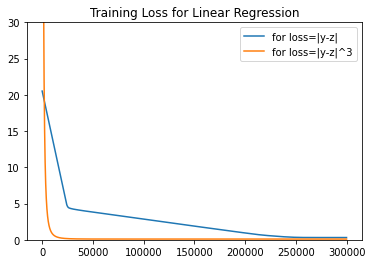

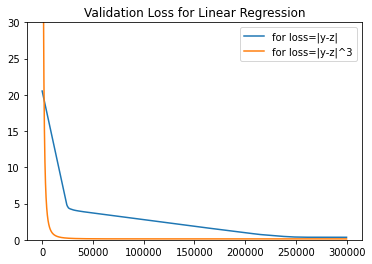

In [ ]:
# Comparing Linear Regression Loss Curves 

_,_,train_loss,test_loss = lin_results[0]
_,_,train_loss1,test_loss1 = lin_results[1] 

plt.plot(train_loss)
plt.plot(train_loss1)
plt.legend(['for loss=|y-z|','for loss=|y-z|^3'])
plt.title('Training Loss for Linear Regression')
plt.ylim((0,30))
plt.show()

plt.plot(test_loss)
plt.plot(test_loss1)
plt.legend(['for loss=|y-z|','for loss=|y-z|^3'])
plt.title('Validation Loss for Linear Regression')
plt.ylim((0,30))
plt.show()

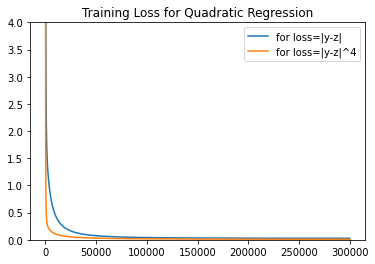

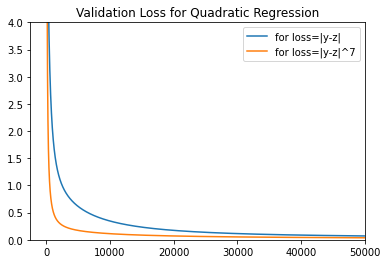

In [ ]:
# Comparing Quadratic Regression Loss Curves 

_,_,_,train_loss,test_loss = quad_results[0]
_,_,_,train_loss1,test_loss1 = quad_results[1] 

plt.plot(train_loss)
plt.plot(train_loss1)
plt.legend(['for loss=|y-z|','for loss=|y-z|^4'])
plt.title('Training Loss for Quadratic Regression')
plt.ylim((0,4))
plt.show()

plt.plot(test_loss)
plt.plot(test_loss1)
plt.legend(['for loss=|y-z|','for loss=|y-z|^7'])
plt.title('Validation Loss for Quadratic Regression')
plt.ylim((0,4))
plt.xlim((-2500,50000))
plt.show()